# Table of content
- [Import data](#Import-data)
- [Briefly explore the imported data](#Briefly-explore-the-imported-data)
- [Plots](#Plots)
    - [Plot 1](#Plot-1): boxplot for general distribution of TPM values for all 6 libraries
    - [Plot 2](#Plot-2): scatter plot for a pair of replicates to assess reproducibility of technical replicates
    - [Plot 3](#Plot-3): density scatter plot of plot 2
    - [Plot 4](#Plot-4): density scatter plots of all UHR replicates
    - [Plot 5](#Plot-5): multi-dimensional scaling distance for all replicates of both samples
    - [Plot 6](#Plot-6): distribution of DEseq2 differential expression values as a histogram
    - [Plot 7](#Plot-7): display the mean expression values from UHR and HBR and mark those that are significantly differentially expressed
    - [Plot 8](#Plot-8): Heatmap
    - [Plot 9](#Plot-9): Vocano plot
- [GTEX](#GTEX)
- [Practice](#Practice):
    - volcano plot for Ballgown DE genes
    - distribution of Ballgown differential expression values as a histogram
    - heatmap for Ballgown significant DE genes
    - heatmap for DESeq2 significant DE genes using normalized counts from htseq-count (NOT THROUGH StringTie gene expression like in plot 8)
    - pheatmap vs. heatmap.2

## In this tutorial you will:

1. Learn basic R usage and commands (common plots, and data manipulation tasks)
2. Examine the expression estimates
3. Create an MDS plot to visualize the differences between/among replicates, library prep methods and UHR versus HBR
4. Examine the differential expression estimates
5. Visualize the expression estimates and highlight those genes that appear to be differentially expressed
6. Ask how reproducible technical replicates are.

Expression and differential expression files will be read into R. The R analysis will make use of the gene-level expression estimates from HISAT2/Stringtie (TPM values) in plots 1, 7, 8 and differential expression results from HISAT2/htseq-count/DESeq2 (fold-changes and p-values) in plots 6, 7, 8, 9.

**Note: According to ChatGPT, using both TPM-based and count-based methods in the same visualization context, especially in the same plots (like plots 7 and 8), is not a standard practice and can be misleading if not carefully explained.**

#### 🔍 What’s Going On Here?
- TPM values from StringTie (plots 1, 7, 8): Are used for visualization like clustering and MDS/PCA. TPM (Transcripts Per Million) is normalized expression, suitable for comparing expression levels within and across samples (but not ideal for DE testing).
- DESeq2 results from htseq-count (plots 6, 7, 8, 9): Use raw counts normalized internally for statistical testing of differential expression, which is based on the negative binomial distribution.
- So, in plots like 7 and 8, they are showing:
    - TPM-based values for sample clustering/heatmaps, and
    = Overlaying DEGs based on p-values and fold-changes from DESeq2.

#### ❓Is this a common or acceptable strategy?
Short answer: It's not standard, and it's risky without clarification.

#### 🚫 Why it’s usually avoided:
TPM and counts represent different quantities:
- TPM reflects relative expression, while raw counts reflect absolute abundance used for statistical modeling.
- Combining both in a single plot (e.g. a heatmap) mixes units and assumptions.
- TPMs often underestimate gene variability compared to raw counts, which affects clustering and interpretation.

#### ✅ When it can be acceptable:
- If the TPM matrix is only used for visual clustering, and DE results are clearly overlaid for interpretation — and this is clearly explained — then it can be a pragmatic, if informal, choice.
- This hybrid approach is more common in exploratory analyses, teaching, or preliminary reports — not in published high-impact work.

In [1]:
mkdir -p $RNA_HOME/de/visualization_advanced
cd $RNA_HOME/de/visualization_advanced

# Import data

In [ ]:
R

#Load your libraries
library(ggplot2)
library(gplots)
library(GenomicRanges)
library(ggrepel)

#Import expression results (TPM values) from the HISAT2/Stringtie pipeline (https://genomedata.org/cri-workshop/gene_tpm_all_samples.tsv)
gene_expression = read.table("~/workspace/rnaseq/expression/stringtie/ref_only/gene_tpm_all_samples.tsv", header = TRUE, stringsAsFactors = FALSE, row.names = 1)

#Import gene name mapping file (https://genomedata.org/cri-workshop/ENSG_ID2Name.txt)
gene_names=read.table("~/workspace/rnaseq/de/htseq_counts/ENSG_ID2Name.txt", header = TRUE, stringsAsFactors = FALSE)

head(gene_names, 2)
colnames(gene_names) = c("gene_id", "gene_name")
head(gene_names, 2)

#Import DE results from the HISAT2/htseq-count/DESeq2 pipeline (http://genomedata.org/cri-workshop/deseq2/DE_all_genes_DESeq2.tsv)
results_genes = read.table("~/workspace/rnaseq/de/deseq2/DE_all_genes_DESeq2.tsv", sep = "\t", header = TRUE, stringsAsFactors = FALSE)

#Set a directory for the output to go to
setwd("~/workspace/rnaseq/de/visualization_advanced")

### Output

#### 1. head(gene_expression,2)
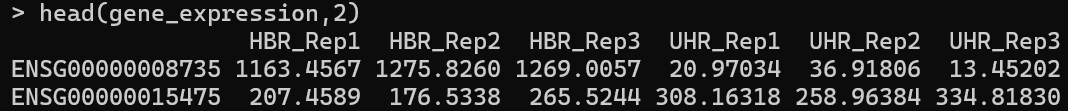

#### 2. head(gene_names,2)
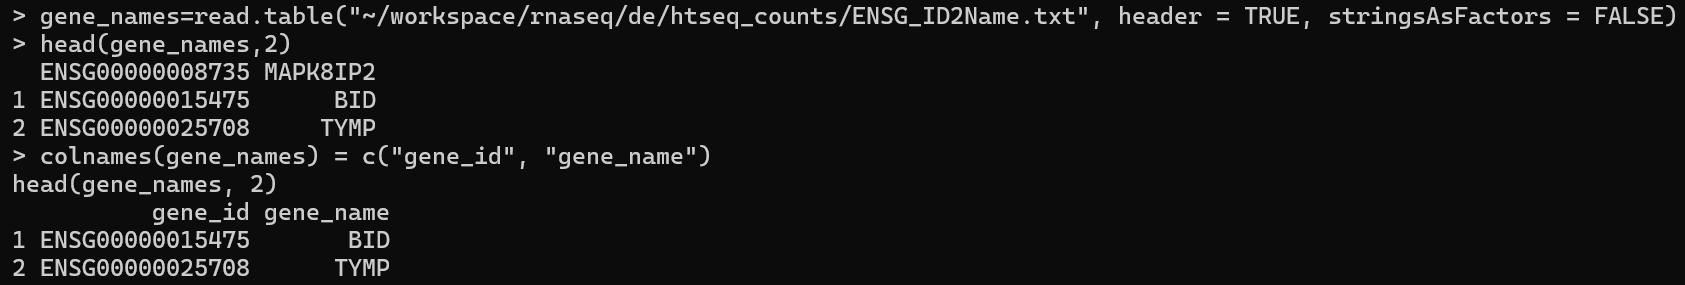

#### 3. head(results_genes,2)
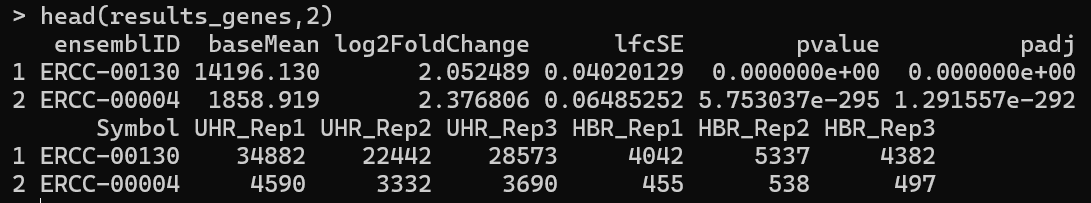


# Briefly explore the imported data

In [ ]:
#### Working with 'dataframes'
#View the first five rows of data (all columns) in the gene_expression (Stringtie TPM) dataframe
head(gene_expression)

#View the column names
colnames(gene_expression)

#View the row names
row.names(gene_expression)

#Determine the dimensions of the dataframe.  'dim()' will return the number of rows and columns
dim(gene_expression) #1410    6

#Get the first 3 rows of data and a selection of columns
gene_expression[1:3, c(1:3, 6)]

#Do the same thing, but using the column names instead of numbers
gene_expression[1:3, c("HBR_Rep1", "HBR_Rep2", "HBR_Rep3", "UHR_Rep3")]

#Now, exlore the differential expression (DESeq2 results) 
head(results_genes)
dim(results_genes) # 449  13

#Assign some colors for use later.  You can specify color by RGB, Hex code, or name
#To get a list of color names:
colours()
# assign color to each sample
data_colors = c("tomato1", "tomato2", "tomato3", "royalblue1", "royalblue2", "royalblue3")

### Output

#### 1. gene_expression[1:3, c(1:3, 6)]
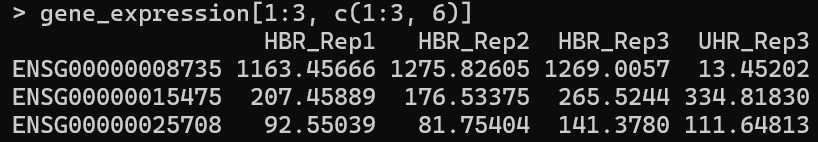

# Plots
## Plot 1
## Plot 2
## Plot 3

In [ ]:
#### Plot #1 - View the range of values and general distribution of TPM values for all 6 libraries
#Create boxplots for this purpose
#Display on a log2 scale and set a minimum non-zero value to avoid log2(0)
min_nonzero = 1

# Set the columns for finding TPM and create shorter names for figures
data_columns = c(1:6)
short_names = c("HBR_1", "HBR_2", "HBR_3", "UHR_1", "UHR_2", "UHR_3")

pdf(file = "All_samples_TPM_boxplots.pdf")
boxplot(log2(gene_expression[, data_columns] + min_nonzero), col = data_colors, names = short_names, las = 2, ylab = "log2(TPM)", main = "Distribution of TPMs for all 6 libraries")
#Note that the bold horizontal line on each boxplot is the median; las=2 means label is perpendicular to axis
dev.off()

#### Plot #2 - plot a pair of replicates to assess reproducibility of technical replicates
#Tranform the data by converting to log2 scale after adding an arbitrary small value to avoid log2(0)
x = gene_expression[, "UHR_Rep1"]
y = gene_expression[, "UHR_Rep2"]
pdf(file = "UHR_Rep1_vs_Rep2_scatter.pdf")
plot(x = log2(x + min_nonzero), y = log2(y + min_nonzero), pch = 16, col = "blue", cex = 0.25, xlab = "TPM (UHR, Replicate 1)", ylab = "TPM (UHR, Replicate 2)", main = "Comparison of expression values for a pair of replicates")

#Add a straight line of slope 1, and intercept 0
abline(a = 0, b = 1)

#Calculate the correlation coefficient and display in a legend
rs = cor(x, y)^2
legend("topleft", paste("R squared = ", round(rs, digits = 3), sep = ""), lwd = 1, col = "black")
dev.off()

#### Plot #3 - Scatter plots with a large number of data points can be misleading ... regenerate this figure as a density scatter plot
pdf(file = "UHR_Rep1_vs_Rep2_SmoothScatter.pdf")
colors = colorRampPalette(c("white", "blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"))
smoothScatter(x = log2(x + min_nonzero), y = log2(y + min_nonzero), xlab = "TPM (UHR, Replicate 1)", ylab = "TPM (UHR, Replicate 2)", main = "Comparison of expression values for a pair of replicates", colramp = colors, nbin = 200)
dev.off()

### Output

#### Plot 1: boxplot for general distribution of TPM values for all 6 libraries
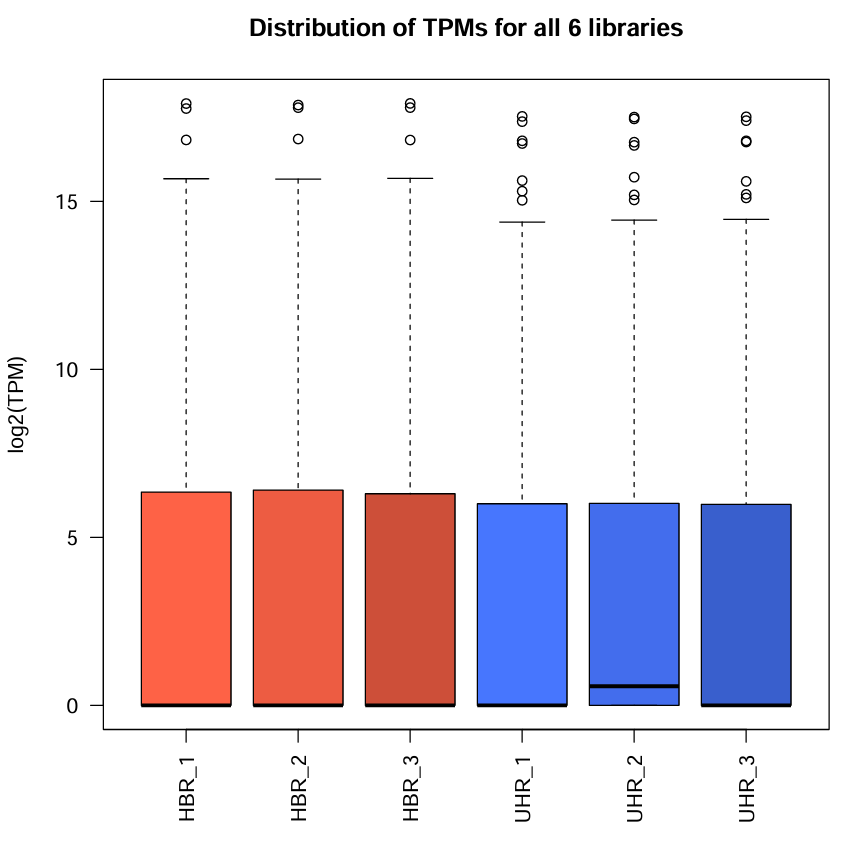

#### Plot 2: scatter plot for a pair of replicates to assess reproducibility of technical replicates
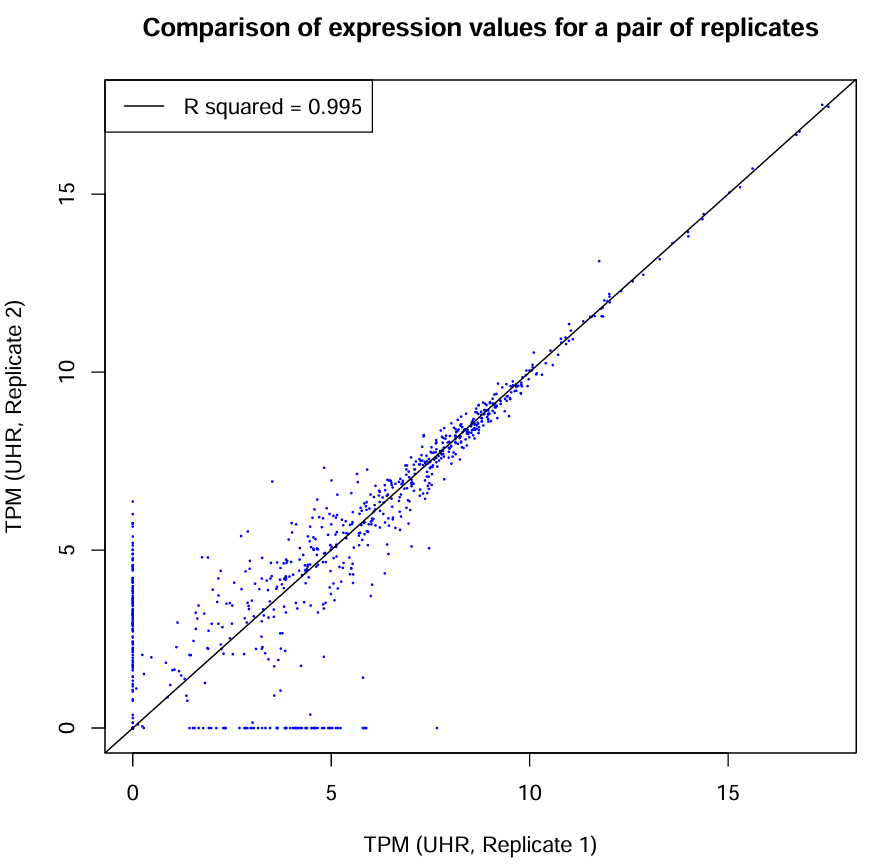

#### Plot 3: density scatter plot of plot 2 (I find it harder to interpret)
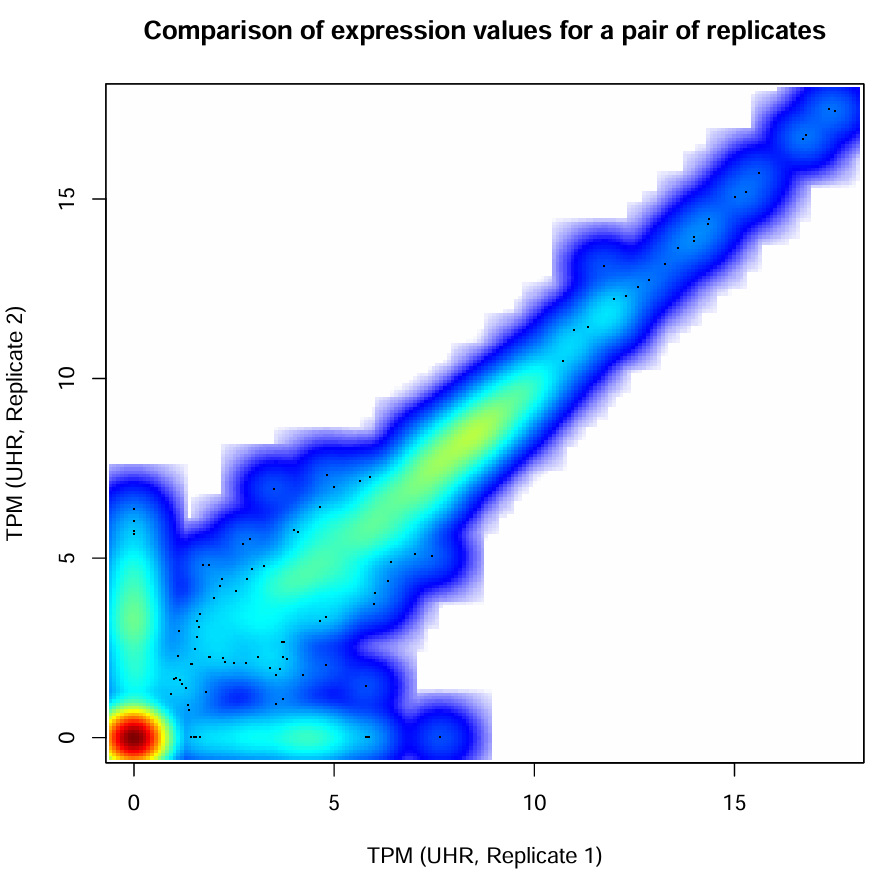

## Plot 4

In [ ]:
#### Plot #4 - Scatter plots of all sets of replicates on a single plot
#Create a function that generates an R plot.  This function will take as input the two libraries to be compared and a plot name
plotCor = function(lib1, lib2, name){
	x = gene_expression[, lib1]
	y = gene_expression[, lib2]
	colors = colorRampPalette(c("white", "blue", "#007FFF", "cyan", "#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"))
	smoothScatter(x = log2(x + min_nonzero), y = log2(y + min_nonzero), xlab = lib1, ylab = lib2, main = name, colramp = colors, nbin = 275)
	abline(a = 0, b = 1)
    zero_count = length(which(x == 0)) + length(which(y == 0))
	rs = cor(x, y, method = "pearson")^2
	legend_text = c(paste("R squared = ", round(rs, digits = 3), sep=""), paste("Zero count = ", zero_count, sep = ""))
	legend("topleft", legend_text, lwd = c(1, NA), col = "black", bg = "white", cex = 0.8)
}

#Now make a call to our custom function created above, once for each library comparison
pdf(file = "UHR_All_Reps_SmoothScatter.pdf")
par(mfrow = c(1, 3)) #present plot in 1 row and 3 columns
plotCor("UHR_Rep1", "UHR_Rep2", "UHR_1 vs UHR_2") #lib1="UHR_Rep1", lib2="UHR_Rep2", title: main=name="UHR_1 vs UHR_2"
plotCor("UHR_Rep2", "UHR_Rep3", "UHR_2 vs UHR_3") #lib1="UHR_Rep2", lib2="UHR_Rep3", title:"UHR_2 vs UHR_3"
plotCor("UHR_Rep1", "UHR_Rep3", "UHR_1 vs UHR_3")

#### Compare the correlation between all replicates
#Do we see the expected pattern for all eight libraries (i.e. replicates most similar, then tumor vs. normal)?

#Calculate the TPM sum for all 6 libraries, keep this sum in a new column "sum" of gene_expression data frame
gene_expression[,"sum"] = apply(gene_expression[,data_columns], 1, sum)

#Identify the genes with a grand sum TPM of at least 5 - we will filter out the genes with very low expression across the board
i = which(gene_expression[,"sum"] > 5)

#Calculate the correlation between all pairs of data
r = cor(gene_expression[i,data_columns], use = "pairwise.complete.obs", method = "pearson")

#Print out these correlation values
r

dev.off()

### Output

#### New column "sum" in gene_expression data frame
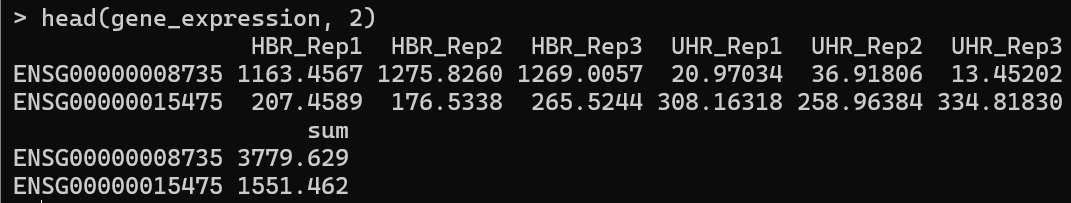

#### We see strong correlation among replicates of each HBR and UHR sample
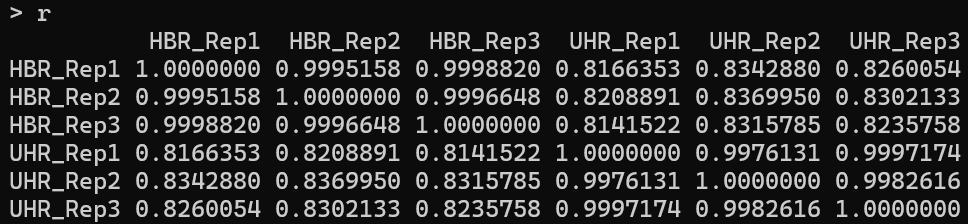

#### Plot 4: Density scatter plots of all UHR replicates
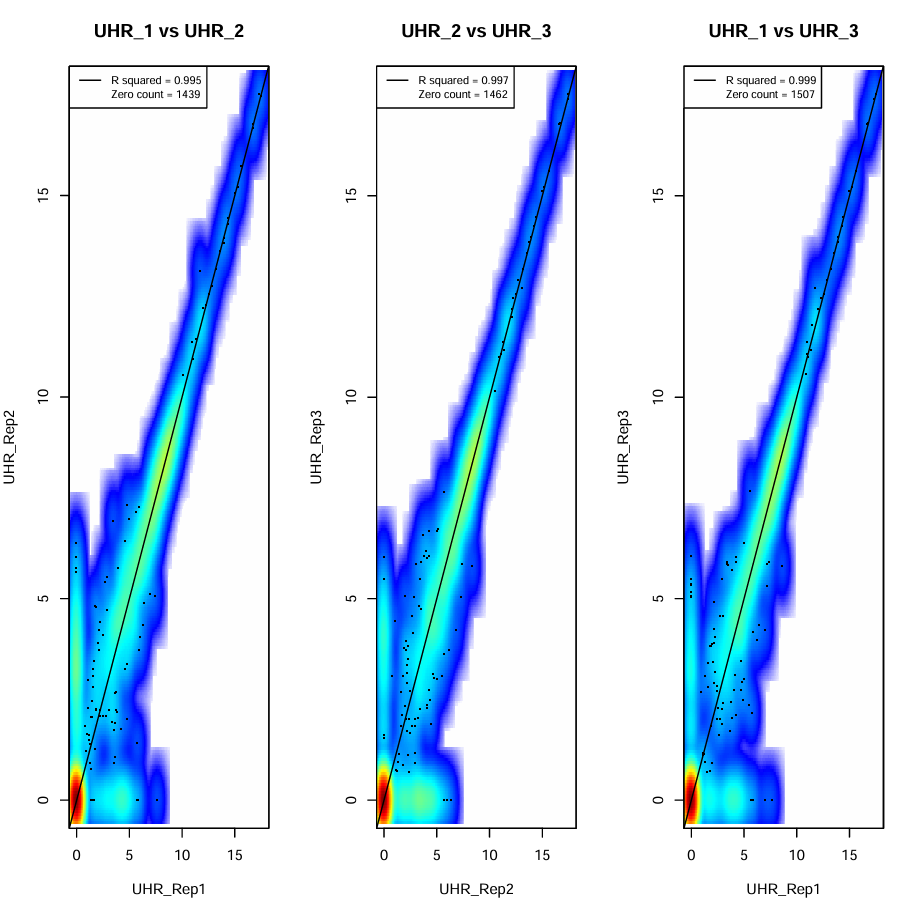

## Plot 5

### ✅ Why MDS is appropriate in this context:
1. Goal is to visualize global similarity/dissimilarity:
- MDS is designed to preserve pairwise distances between samples.
- In RNA-seq, after normalization, we often compute distances between sample expression profiles (rows or columns of a TPM or counts matrix).
- MDS plots allow you to see how similar or different samples are—exactly what the course aims to show (e.g., replicates clustering, separation of UHR vs. HBR).

2. MDS does not assume linear relationships:
- PCA assumes linear variance structures; MDS is more general.
- If relationships between samples are not linear (e.g., driven by library prep method or batch effect), MDS may capture the pattern better.

3. Input is a distance matrix:
- In the course, they calculate a Euclidean distance matrix from the normalized expression data (e.g., log2-transformed TPMs).
- This is a textbook setup for classical MDS (aka metric MDS), which maps distances into a lower-dimensional space.

4. Interpretation focuses on sample relationships:
- MDS is often used in exploratory data analysis to:
    - Check whether replicates cluster together (quality check).
    - See if treatment groups (UHR vs. HBR) separate.
    - Detect batch effects (e.g., from library prep).

### ✅ Bonus: MDS is common in RNA-seq workflows
You’ll find MDS plots used in:
- edgeR: plotMDS() is a core visualization function.
- DESeq2: Uses PCA by default, but MDS is a good alternative.
- limma-voom: Often shows sample MDS plots before modeling.

In [ ]:
#### Plot #5 - Convert correlation to 'distance', and use 'multi-dimensional scaling' to display the relative differences between libraries
#This step calculates 2-dimensional coordinates to plot points for each library
#Libraries with similar expression patterns (highly correlated to each other) should group together
#What pattern do we expect to see, given the types of libraries we have (technical replicates, biologal replicates, tumor/normal)?
pdf(file = "UHR_vs_HBR_MDS.pdf")
d = 1 - r
mds = cmdscale(d, k = 2, eig = TRUE) #k = 2 means you're projecting the data into 2D space for visualization.
par(mfrow = c(1,1))
plot(mds$points, type = "n", xlab = "", ylab = "", main = "MDS distance plot (all non-zero genes)", xlim = c(-0.12, 0.12), ylim = c(-0.12, 0.12))
points(mds$points[, 1], mds$points[, 2], col = "grey", cex = 2, pch = 16)
text(mds$points[, 1], mds$points[, 2], short_names, col = data_colors)
dev.off()

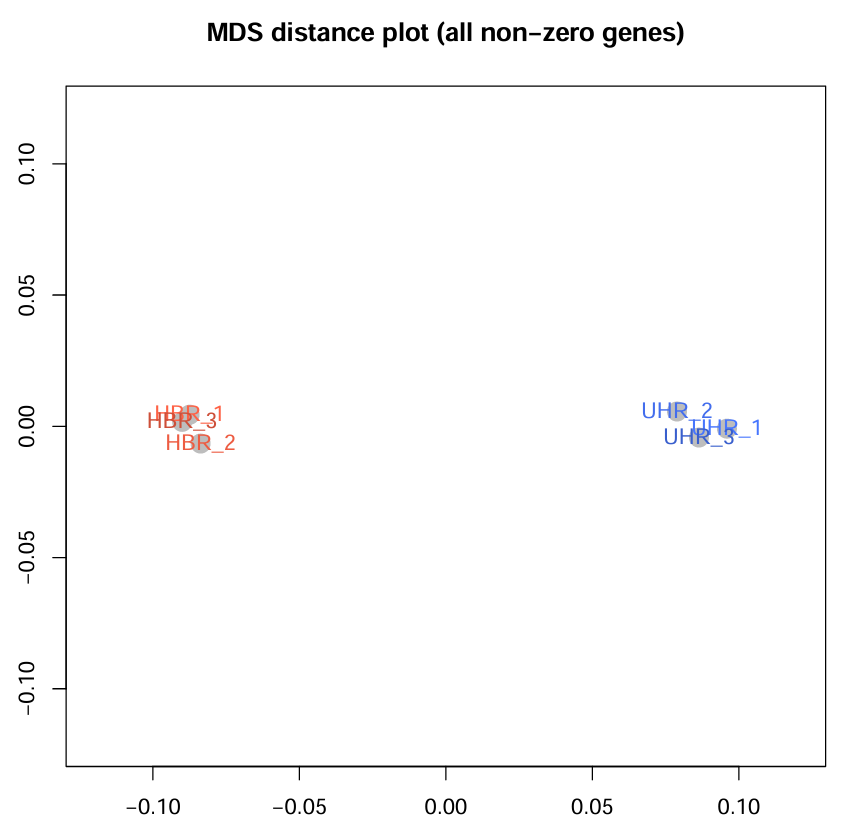

### Since we've already loaded ggplot2 and ggrepel, switching to geom_text_repel() will give you beautiful non-overlapping labels with leader lines.
📝 Notes:
- geom_text_repel() automatically prevents label overlap.
- min.segment.length=0 means to draw a segment if the line connecting the label to the point is longer than 0 unit (on the plot's coordinate scale). This forces ggrepel to draw the line even if it’s very short.
- segment.color = "black" draws a line from the point to the label.
- scale_color_identity() uses Color values (already defined in data_colors) as actual colors.
- max.overlaps = Inf ensures all labels are shown.

In [ ]:
# Prepare a data frame for ggplot
mds_df <- data.frame(
  Dim1 = mds$points[, 1],
  Dim2 = mds$points[, 2],
  Sample = short_names,
  Color = data_colors
)

# Plot using ggplot2 + ggrepel
pdf("UHR_vs_HBR_MDS_ggplot.pdf")
ggplot(mds_df, aes(x = Dim1, y = Dim2)) +
  geom_point(color = "grey20", size = 3) +
  geom_text_repel(aes(label = Sample, color = Color), 
                  show.legend = FALSE, 
                  max.overlaps = Inf, 
                  #min.segment.length = 0,
                  segment.color = "black") +
  scale_color_identity() +
  theme_classic(base_size = 14) + #theme_minimal returns inner grid lines and no outter border lines by default
  labs(title = "MDS distance plot (all non-zero genes)",
       x = "Dimension 1", y = "Dimension 2") +
  xlim(-0.12, 0.12) +
  ylim(-0.12, 0.12)
dev.off()

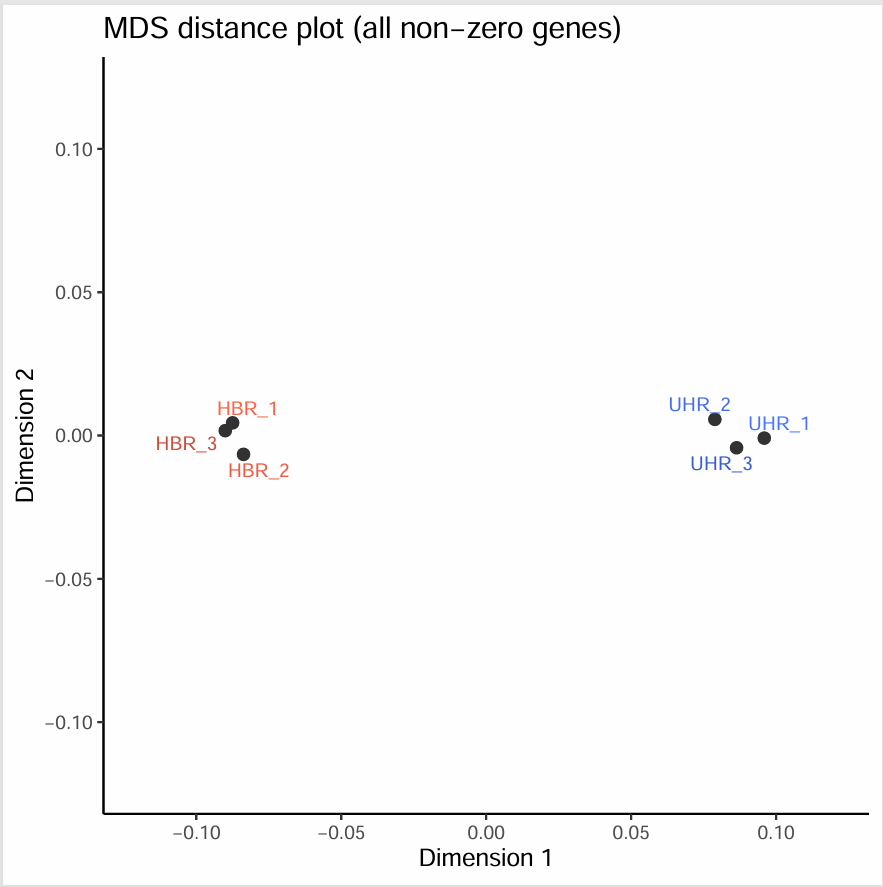

## Plot 6

In [ ]:
#### Plot #6 - View the distribution of Deseq2 differential expression values as a histogram
#Display only those results that are significant according to DESeq2 (loaded above)
pdf(file = "DESeq2_FC_distribution.pdf")
sig = which(results_genes$pvalue < 0.05) #why not "padj < 0.05"?
hist(results_genes[sig, "log2FoldChange"], breaks = 50, col = "seagreen", xlab = "log2(Fold change) UHR vs HBR", main = "Distribution of differential expression values-DESeq2")
abline(v = -2, col = "black", lwd = 2, lty = 2)
abline(v = 2, col = "black", lwd = 2, lty = 2)
legend("topleft", "Fold-change > 2", lwd = 2, lty = 2)
dev.off()

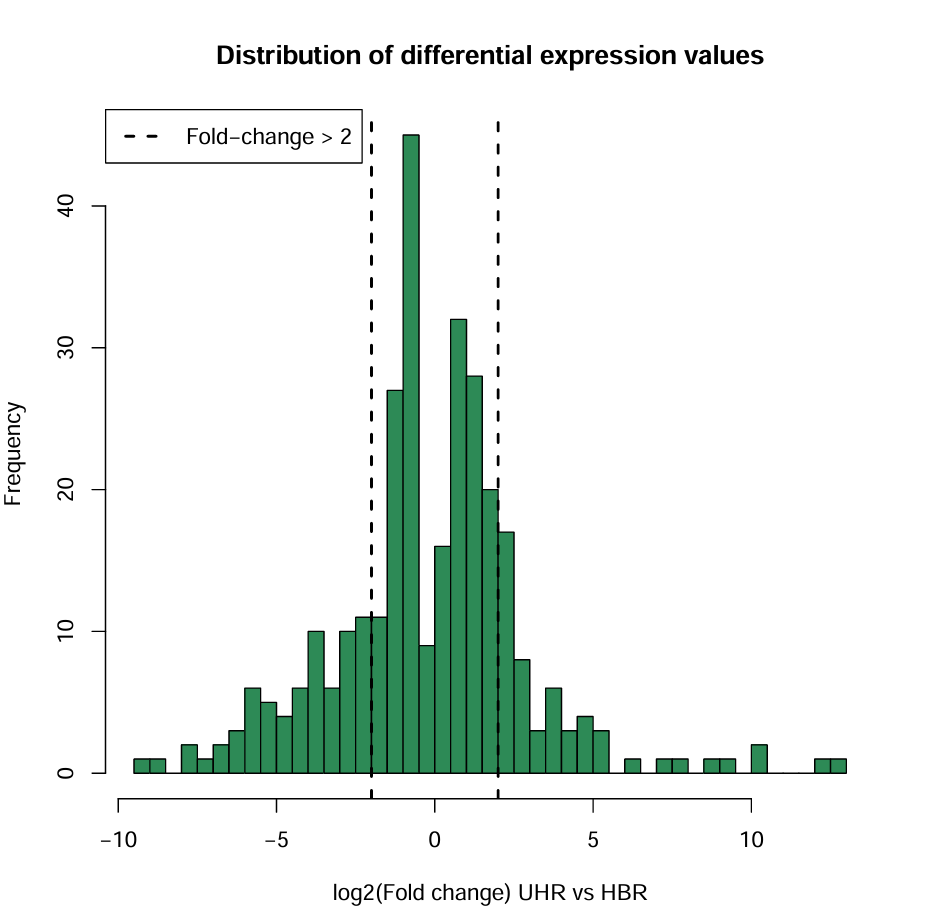

## Plot 7
### Don't run this code chunk from the course, it needs correction in my understanding (explanation below), run the "Corrected code for plot 7" below

In [ ]:
#### Plot #7 - Display the mean expression values from UHR and HBR and mark those that are significantly differentially expressed
pdf(file="UHR_vs_HBR_mean_TPM_scatter.pdf")

gene_expression[, "HBR_mean"] = apply(gene_expression[,c(1:3)], 1, mean)
gene_expression[, "UHR_mean"] = apply(gene_expression[,c(4:6)], 1, mean)

x = log2(gene_expression[, "UHR_mean"] + min_nonzero)
y = log2(gene_expression[, "HBR_mean"] + min_nonzero)
plot(x = x, y = y, pch = 16, cex = 0.25, xlab = "UHR TPM (log2)", ylab = "HBR TPM (log2)", main = "UHR vs HBR TPMs")
abline(a = 0, b = 1)
xsig = x[sig] #sig = which(results_genes$pvalue < 0.05)
ysig = y[sig]
points(x = xsig, y = ysig, col = "magenta", pch = 16, cex = 0.5)
legend("topleft", "Significant", col = "magenta", pch = 16)

#Get the gene symbols for the top N (according to corrected p-value) and display them on the plot
topn = order(results_genes[sig,"padj"])[1:25]
text(x[topn], y[topn], results_genes[topn, "Symbol"], col = "black", cex = 0.75, srt = 45)

dev.off()


### Code explanation
How can x[sig] work correctly if x comes from gene_expression and sig comes from results_genes — two different data frames? The answer lies in row order and alignment.

- x is a numeric vector of log2(UHR_mean) for each row (gene) in gene_expression.
- sig is a vector of row indices from results_genes where p-value < 0.05.
    - So sig = e.g., c(1, 2, 7, 11, ...).

The course's code assumes that the rows in gene_expression and results_genes are in the exact same order, i.e., both data frames are aligned by gene (e.g., same row i refers to the same gene in both).

This is why indexing x[sig] is allowed — you're assuming: x[i] corresponds to gene i in results_genes[i, ].

🧠 Why this could be dangerous: You can see that the first row of gene_expression is an ENSG gene, while the first row of results_genes is an ERCC spike-in. This means the assumption of row alignment may not be true, and x[sig] might not correspond to the correct genes in results_genes.

### Corrected code for plot 7:
- Since gene_expression has 1410 rows and results_genes only 449, we first need to filter to only the genes shared between the two datasets.
- Note that, I'm not so much interested in genes with lowest corrected p-value "padj", I'm more interested in top upregulated genes in HBR and UHR. Therefore, my scatter plot below includes genes with largest negative and positive log2FC.

In [ ]:
# Add 2 new mean columns to gene_expression data frame
gene_expression[, "HBR_mean"] = apply(gene_expression[,c(1:3)], 1, mean)
gene_expression[, "UHR_mean"] = apply(gene_expression[,c(4:6)], 1, mean)

# Since gene_expression has 1410 rows and results_genes only 449, we first need to filter to only the genes shared between the two datasets:
common_genes <- intersect(rownames(gene_expression), results_genes$ensemblID)
results_genes_matched <- results_genes[match(common_genes, results_genes$ensemblID), ]
gene_expression_filtered <- gene_expression[common_genes, ]
all.equal(rownames(gene_expression_filtered), results_genes_matched$ensemblID)  # should return TRUE
#head(rownames(gene_expression_filtered),2)
#head(results_genes_matched$ensemblID, 2)

# Now safely use p-values for aligned genes
sig = which(results_genes_matched$pvalue < 0.05)
# xsig = log2(gene_expression_filtered[sig, "UHR_mean"] + min_nonzero); ysig = log2(gene_expression_filtered[sig, "HBR_mean"] + min_nonzero) OR:
x = log2(gene_expression_filtered[, "UHR_mean"] + min_nonzero)
y = log2(gene_expression_filtered[, "HBR_mean"] + min_nonzero)
xsig = x[sig]
ysig = y[sig]

# Confirm that x[sig] is the log2-transformed "UHR_mean" values for genes where pvalue < 0.05:
# Manual extraction for validation
manual_x = log2(gene_expression_filtered[sig, "UHR_mean"] + min_nonzero)
# Compare with x[sig]
all.equal(x[sig], manual_x) #TRUE

pdf(file = "UHR_vs_HBR_mean_TPM_scatter_topFC.pdf")
plot(x = x, y = y, pch = 16, cex = 0.25,
     xlab = "UHR TPM (log2)", ylab = "HBR TPM (log2)",
     main = "UHR vs HBR TPMs")
abline(a = 0, b = 1)
points(x = xsig, y = ysig, col = "magenta", pch = 16, cex = 0.5)
legend("topleft", "Significant (pvalue < 0.05)", col = "magenta", pch = 16) 

# Get indices of sig genes sorted by log2FC
sig_log2fc <- results_genes_matched$log2FoldChange[sig]
top_neg <- sig[order(sig_log2fc)][1:4]       # Most negative log2FC
top_pos <- sig[order(sig_log2fc, decreasing = TRUE)][1:4]  # Most positive log2FC
top_genes <- c(top_neg, top_pos)

# Add gene symbols to the plot
text(x[top_genes], y[top_genes],
     labels = results_genes_matched$Symbol[top_genes],
     col = "black", cex = 0.5, srt = 45) #rotates the text 45 degrees counterclockwise
dev.off()

### Explanation

#### common_genes names
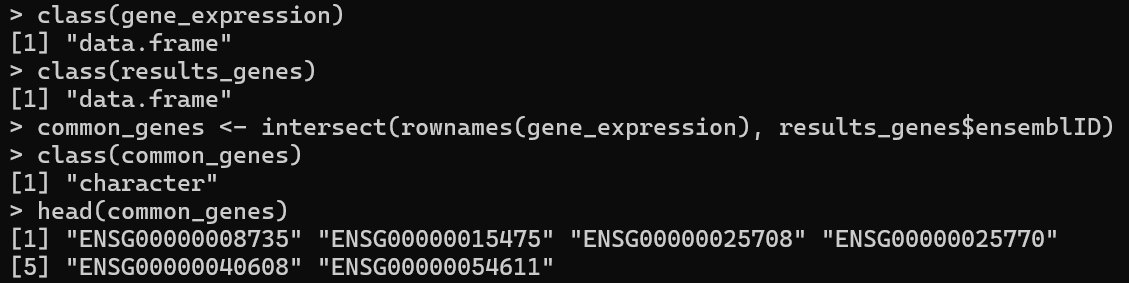

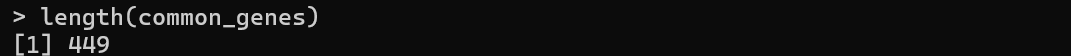

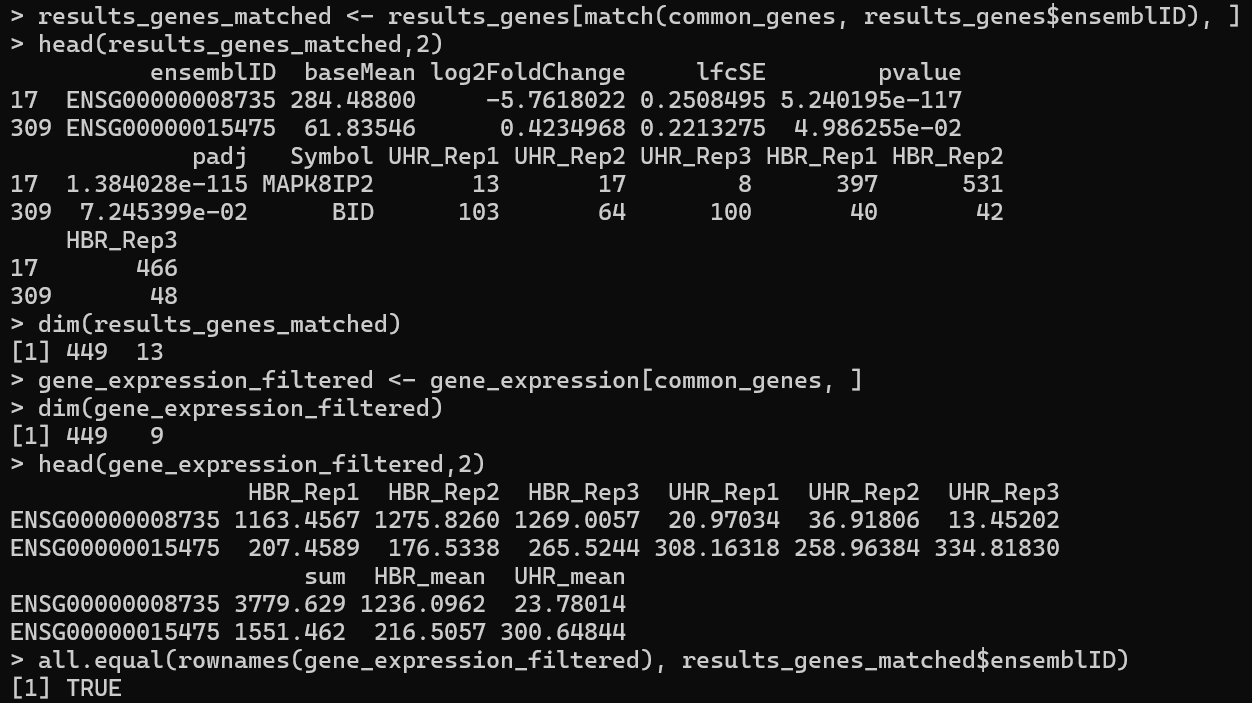

🤔 But why do the indices (like 17, 309) look out of order in **results_genes_matched**? Because:
- Those numbers are the original row indices from results_genes
- We’ve simply reordered results_genes into a new object results_genes_matched
- R keeps the original row numbers as a display label (unless you reset them)

✅ So it's expected and not a problem — the rows are now correctly aligned even if their source row numbers were scattered.

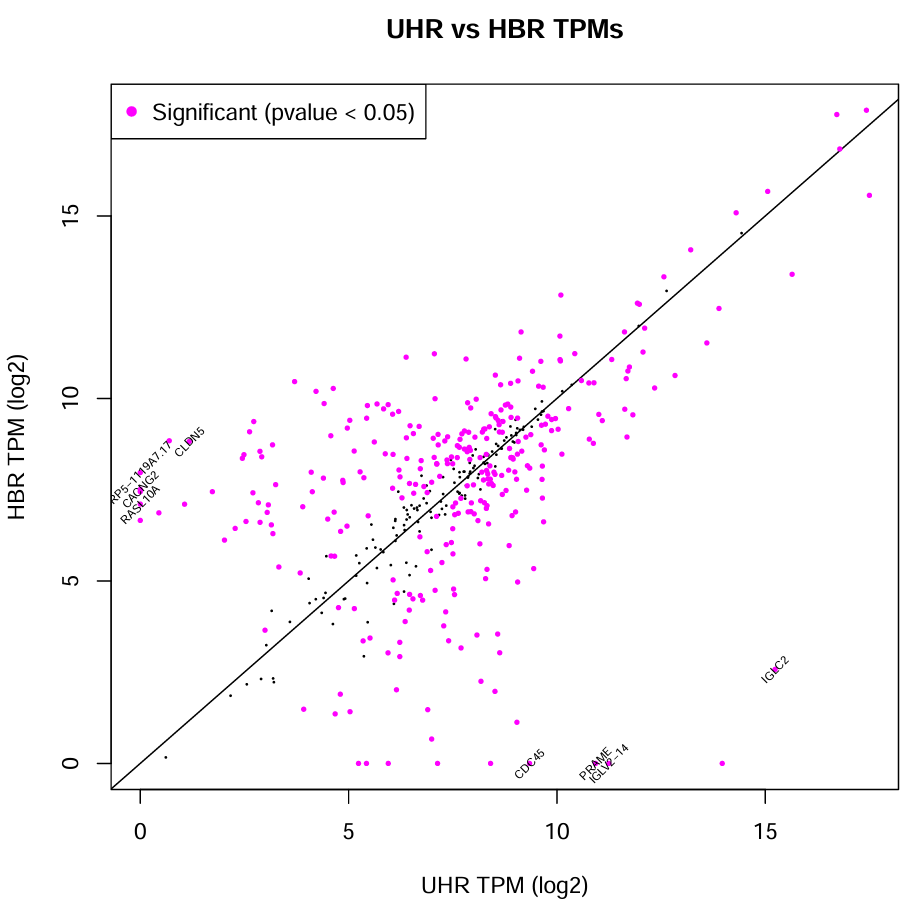

## Plot 8

In [ ]:
#### Plot #8 - Create a heatmap to vizualize expression differences between the six samples
#Define custom dist and hclust functions for use with heatmaps
mydist = function(c) {dist(c, method = "euclidian")}
myclust = function(c) {hclust(c, method = "average")}

#Create a subset of significant genes with p-value<0.05 and log2 fold-change >= 2
sigpi = which(results_genes[, "pvalue"] < 0.05)
sigp = results_genes[sigpi, ]
sigfc = which(abs(sigp[, "log2FoldChange"]) >= 2)
sigDE = sigp[sigfc, ]

pdf(file = "DESeq2_heatmap_sigDE.pdf")
main_title = "sig DE Genes"
par(cex.main = 0.8)
sigDE_genes = sigDE[, "ensemblID"]
sigDE_genenames = sigDE[, "Symbol"]

data = log2(as.matrix(gene_expression[as.vector(sigDE_genes), data_columns]) + 1)
heatmap.2(data, hclustfun = myclust, distfun = mydist, na.rm = TRUE, scale = "none", dendrogram = "both", margins = c(10,4), Rowv = TRUE, Colv = TRUE, symbreaks = FALSE, key = TRUE, symkey = FALSE, density.info = "none", trace = "none", main = main_title, cexRow = 0.3, cexCol = 1, labRow = sigDE_genenames, col = rev(heat.colors(75)))
dev.off()

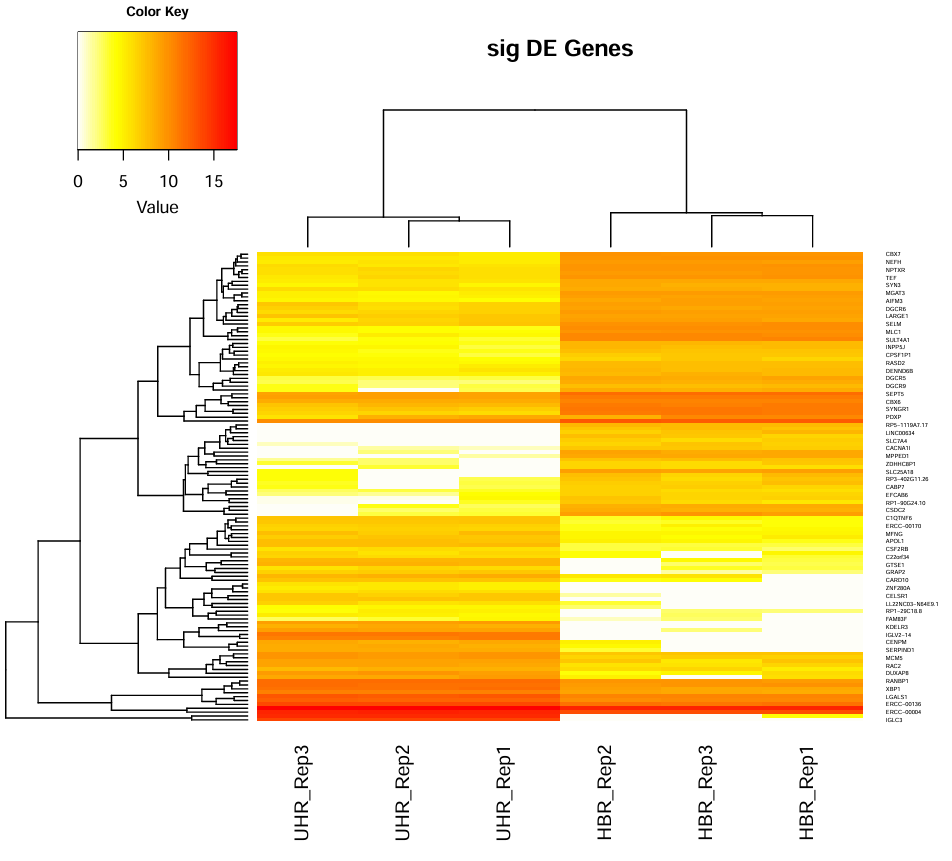

## Plot 9

In [ ]:
#### Plot #9 - Volcano plot

# Set differential expression status for each gene - default all genes to "no change"
results_genes$diffexpressed = "No"

# if log2Foldchange > 2 and pvalue < 0.05, set as "Up regulated"
results_genes$diffexpressed[results_genes$log2FoldChange >= 2 & results_genes$pvalue < 0.05] = "Higher in UHR"

# if log2Foldchange < -2 and pvalue < 0.05, set as "Down regulated"
results_genes$diffexpressed[results_genes$log2FoldChange <= -2 & results_genes$pvalue < 0.05] = "Higher in HBR"

# write the gene names of those significantly upregulated/downregulated to a new column
results_genes$gene_label = NA
results_genes$gene_label[results_genes$diffexpressed != "No"] = results_genes$Symbol[results_genes$diffexpressed != "No"]

pdf(file = "DESeq2_volcano.pdf")
ggplot(data = results_genes[results_genes$diffexpressed != "No",], aes(x = log2FoldChange, y = -log10(pvalue), label = gene_label, color = diffexpressed)) +
             xlab("log2Foldchange") #try: xlab(expression(Log[2]~Fold~Change)) 
             +
             scale_color_manual(name = "Differentially expressed", values=c("blue", "red")) +
             geom_point() +
             theme_minimal() +
             geom_text_repel() +
             geom_vline(xintercept = c(-0.6, 0.6), col = "red") +
             geom_hline(yintercept = -log10(0.05), col = "red") +
             guides(colour = guide_legend(override.aes = list(size=5))) +
             geom_point(data = results_genes[results_genes$diffexpressed == "No",], aes(x = log2FoldChange, y = -log10(pvalue)), colour = "black")
dev.off()

#To exit R type:
#quit(save = "no")

Note: xlab("log2Foldchange") is not strictly necessary in our case, because the x-axis label will automatically be derived from the aes(x = log2FoldChange, ...), using the variable name log2FoldChange.

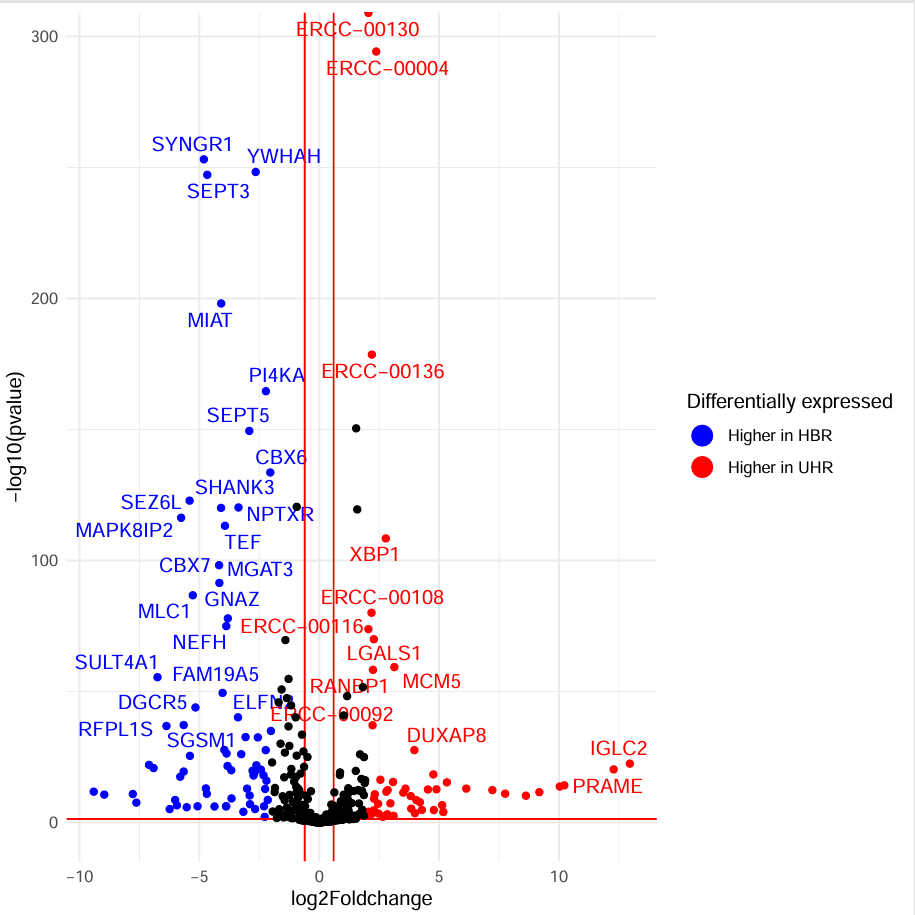

# GTEX
One can manually explore interesting looking genes from the volcano plot. In this case our analysis involves comparison of RNA isolated from tissues of different types (HBR -> brain tissue, UHR -> a collection of cancer cell lines). So, in this analysis it might make sense to explore candidates in a tissue expression atlas such as [GTEX](https://gtexportal.org/home/).

Looking at our gene plot, two example genes we could look at are: SEPT3 ENSG00000100167 (significantly higher in HBR) and PRAME ENSG00000185686 (significantly higher in UHR).

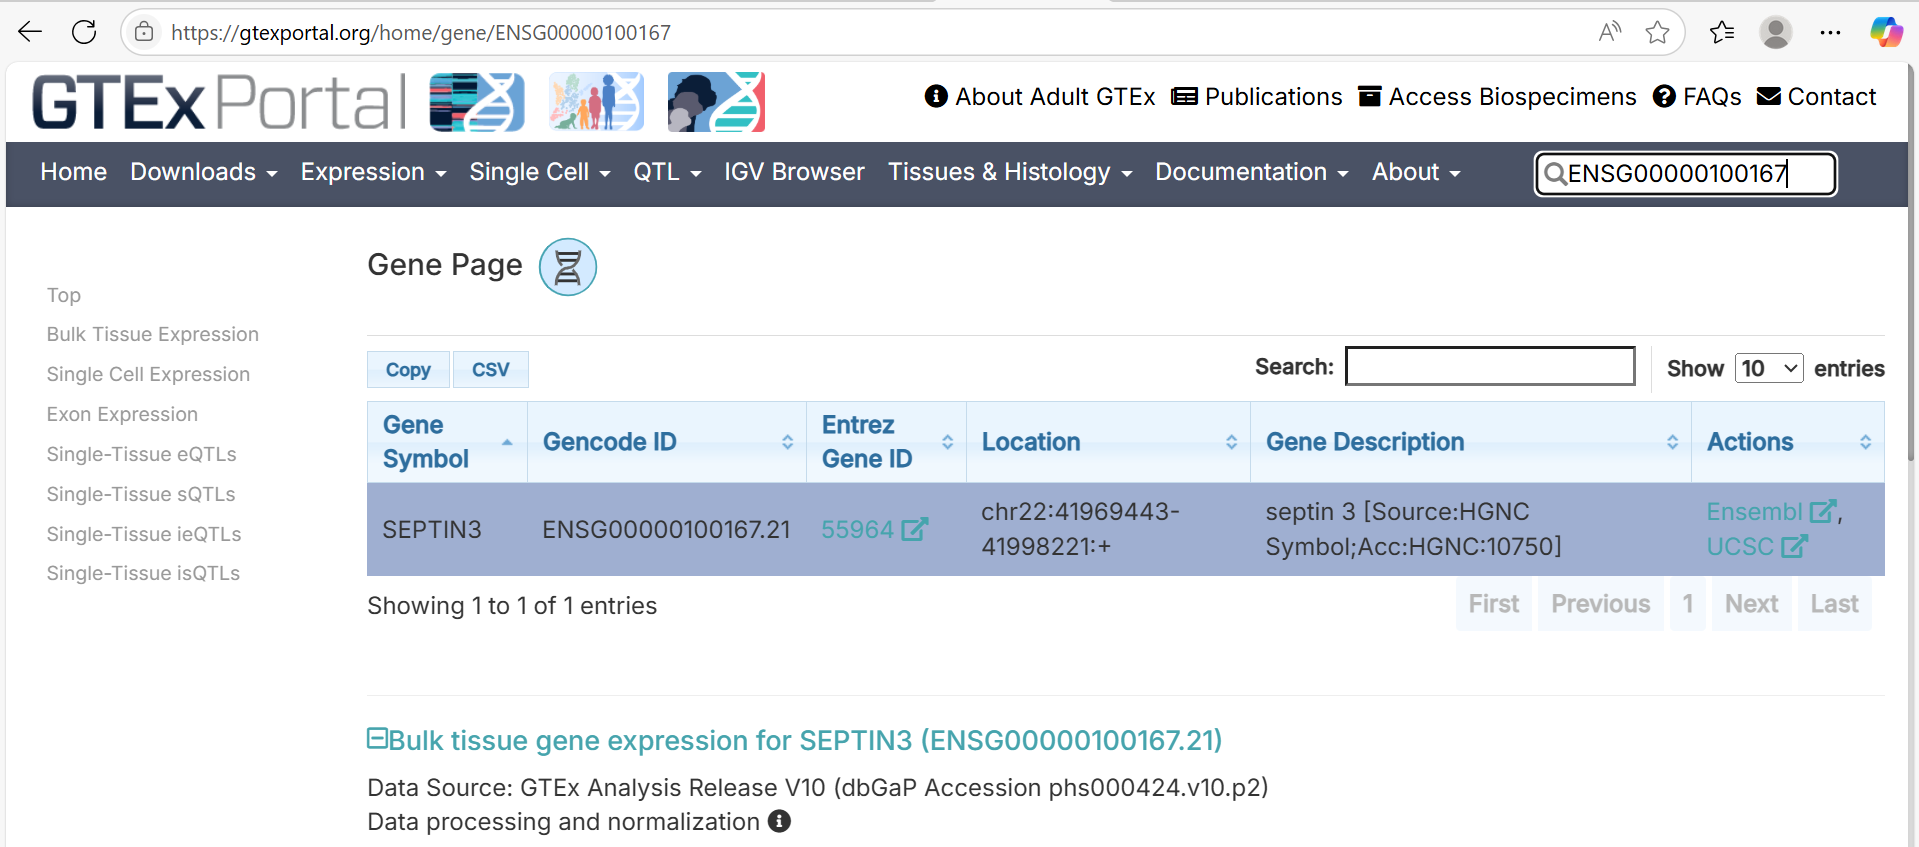
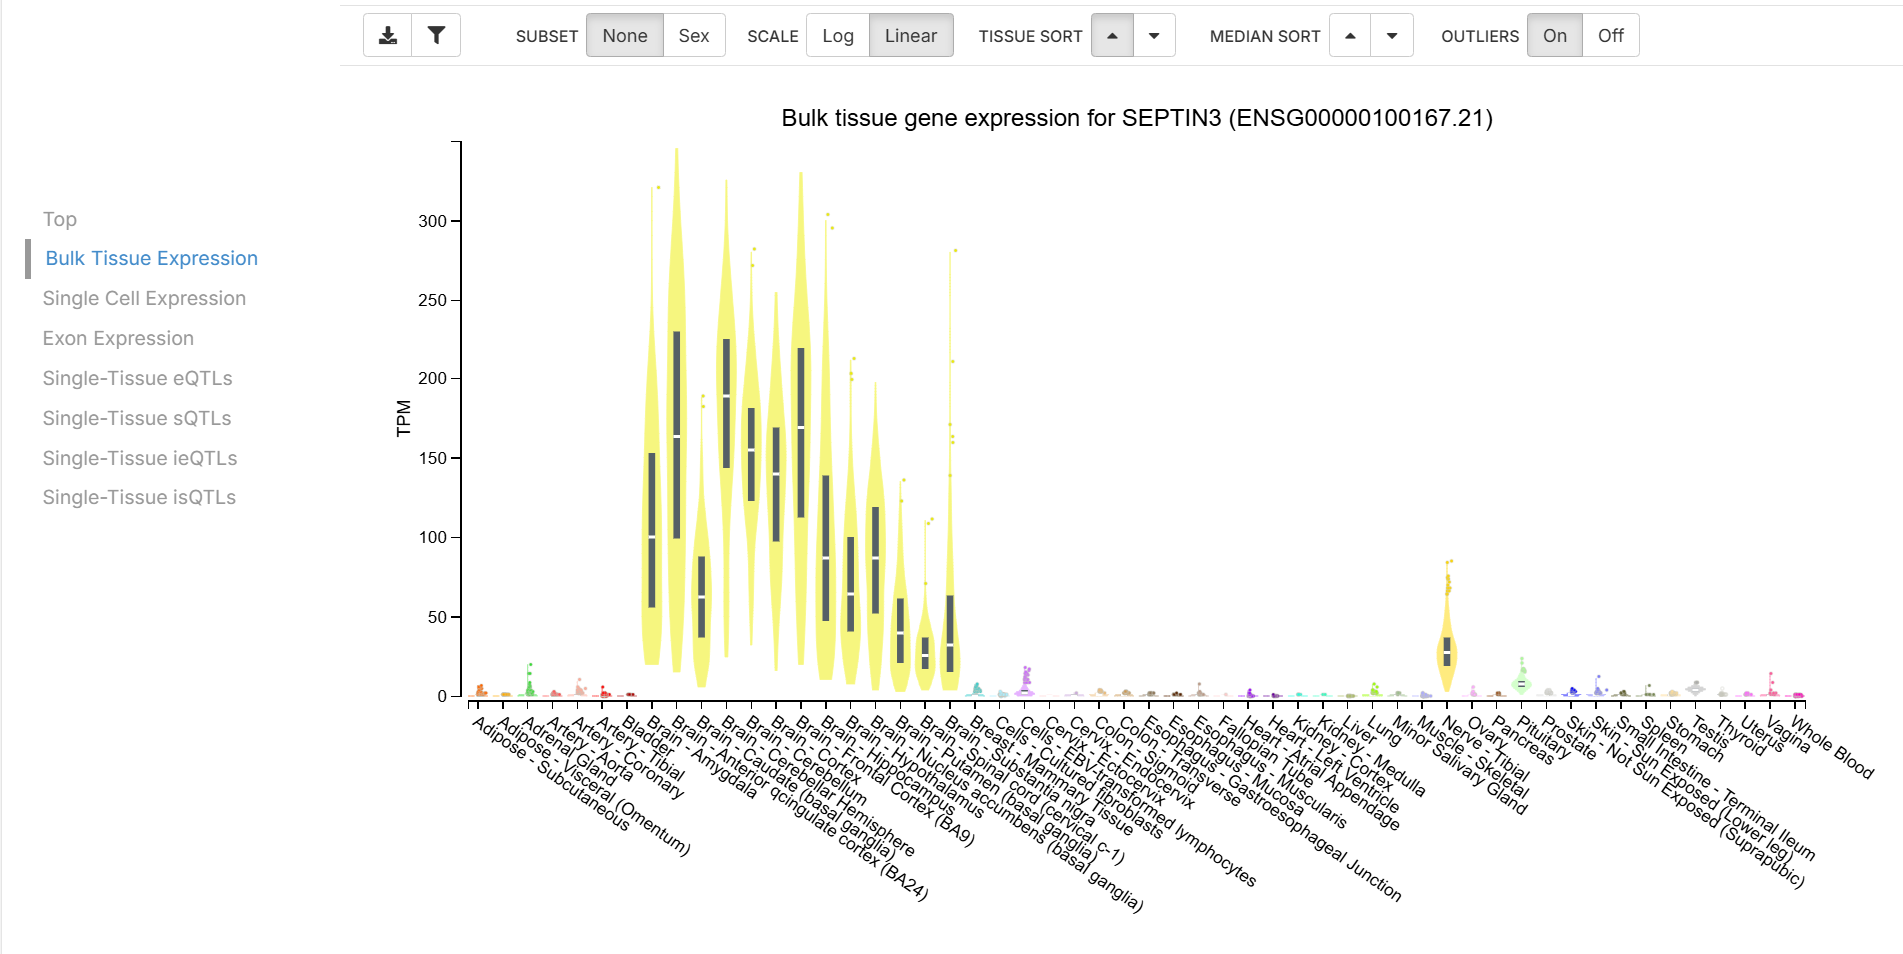
Note that SEPTIN3 (SEPT3) gene appears to be highly expressed in brain tissues.

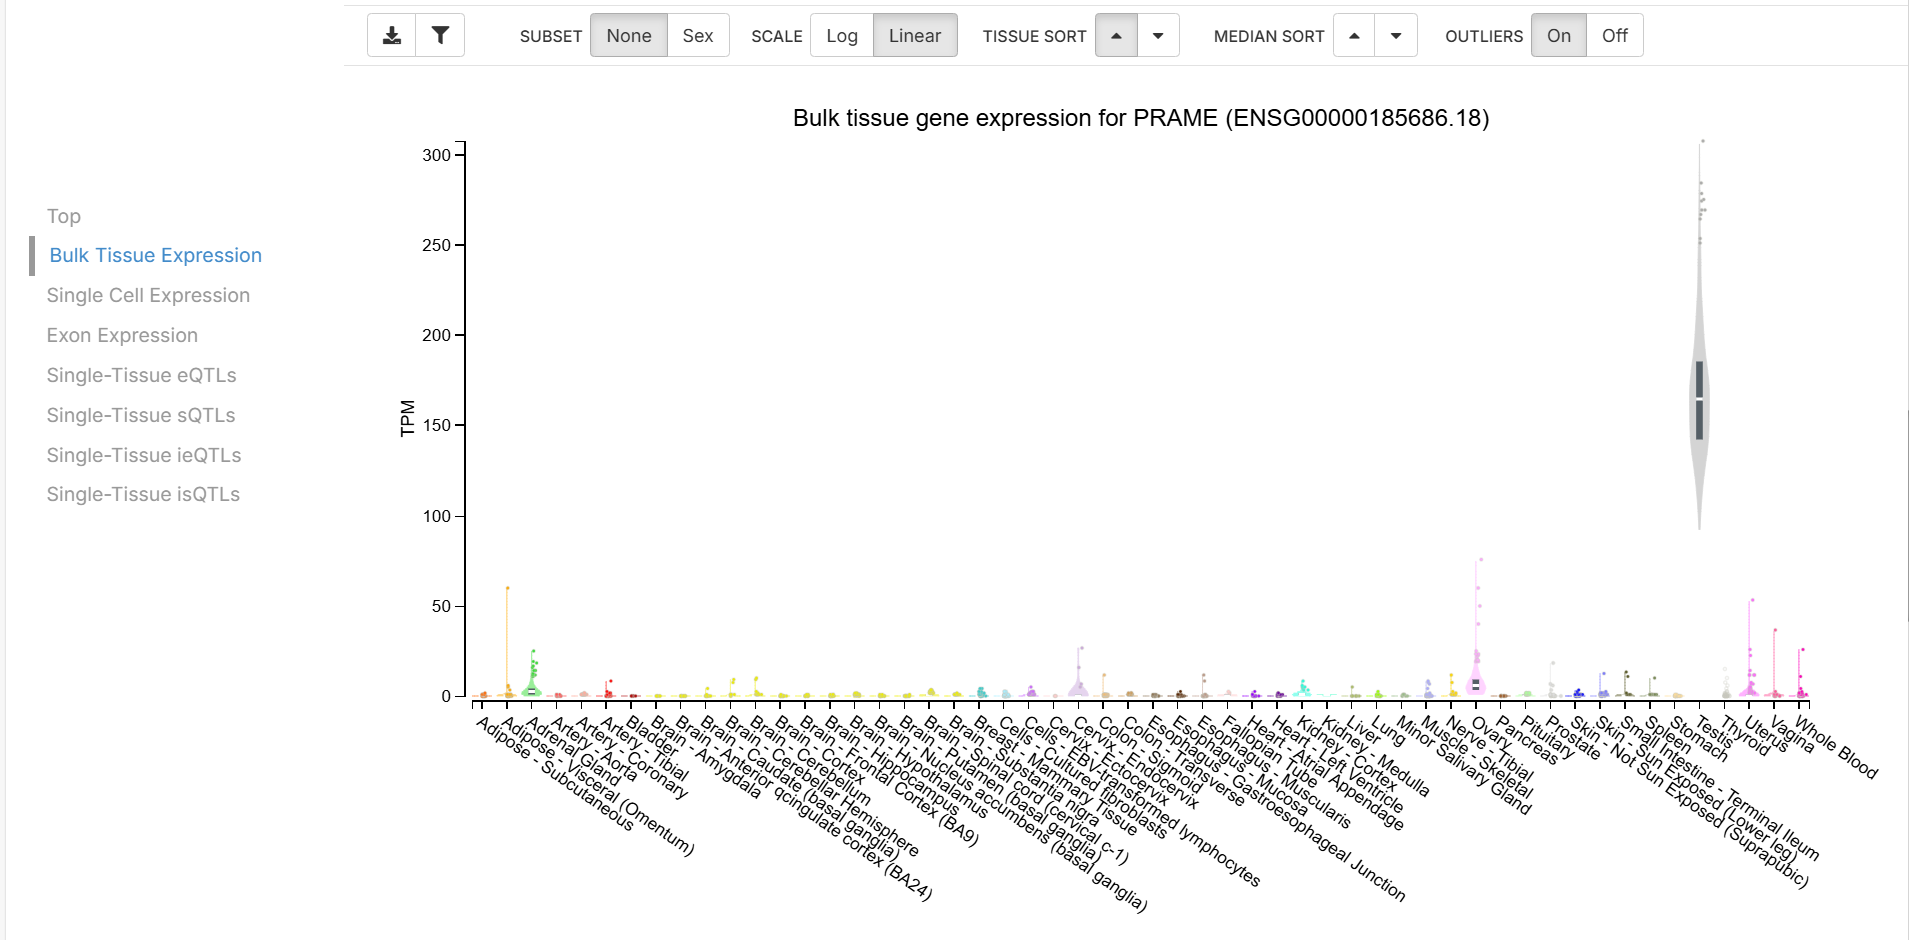
Note that PRAME gene appears to be almost uniquely expressed in testis tissue. Since one of the cell lines in the UHR sample is a testicular cancer cell line, this makes sense.

# Practice
Use R to create a volcano plot for the differentially expressed genes you identified with Ballgown.
- Hint: You could import the ballgown data object (e.g., bg.rda) that you should have saved in Practical Exercise 9 as a source of DE results.
- Solution: When you are ready you can check your approach against the [Solutions](https://rnabio.org/module-09-appendix/0009/05/01/Practical_Exercise_Solutions/#practical-exercise-10---volcano-plot) below:

In [ ]:
cd $RNA_HOME/de/ballgown/ref_only/

R

#Load libraries

library(ballgown)
library(ggplot2)
library(gplots)
library(GenomicRanges)
library(ggrepel)

#### Import the gene expression data from the practical exercises (HISAT2/StringTie/Ballgown practicals)

#Set working directory where results files exist
setwd("~/workspace/rnaseq/de/ballgown/ref_only")

# List the current contents of this directory
dir()

#Import expression and differential expression results from the HISAT2/StringTie/Ballgown pipeline
load('bg.rda')

# View a summary of the ballgown object
bg

# Load gene names for lookup later in the tutorial
bg_table = texpr(bg, 'all')
bg_gene_names = unique(bg_table[, 9:10])

# Note: You can filter out low-abundance genes before the following step. View Module03_Stringtie_Ballgown.ipynb for the code
# bg_filt = subset (bg, "rowVars(texpr(bg)) > 1", genomesubset = TRUE)


# Calculate the differential expression results including significance
results_genes = stattest(bg, feature="gene", covariate="type", getFC=TRUE, meas="FPKM")
results_genes = merge(results_genes,bg_gene_names,by.x=c("id"),by.y=c("gene_id"))
results_genes[,"de"] = log2(results_genes[,"fc"])

#### Plot a volcano plot

# Create a new diffexpressed column and set all genes to "no change"
results_genes$diffexpressed <- "No"

# if log2Foldchange > 2 and pvalue < 0.05, set as "Up regulated"
results_genes$diffexpressed[results_genes$de > 2 & results_genes$pval < 0.05] <- "Higher in UHR" #originally: de > 0.6

# if log2Foldchange < -2 and pvalue < 0.05, set as "Down regulated"
results_genes$diffexpressed[results_genes$de < -2 & results_genes$pval < 0.05] <- "Higher in HBR" #originally: de < -0.6

# Create a new gene label column and populate with NA values
results_genes$gene_label <- NA

# write the gene names of those significantly upregulated/downregulated to a new column
results_genes$gene_label[results_genes$diffexpressed != "No"] <- results_genes$gene_name[results_genes$diffexpressed != "No"]

pdf(file="Ballgown_volcano.pdf")
ggplot(data=results_genes[results_genes$diffexpressed != "No",], aes(x=de, y=-log10(pval), label=gene_label, color = diffexpressed)) +
             xlab(expression(Log[2]~Fold~Change)) +
             scale_color_manual(name = "Differentially expressed", values=c("blue", "red")) +
             geom_point() +
             theme_minimal() +
             geom_text_repel() +
             geom_vline(xintercept=c(-2, 2), col="red") +
             geom_hline(yintercept=-log10(0.05), col="red") +
             guides(colour = guide_legend(override.aes = list(size=5))) +
             geom_point(data = results_genes[results_genes$diffexpressed == "No",], aes(x=de, y=-log10(pval)), colour = "black") + 
             ggtitle("Ballgown Volcano Plot")
dev.off()
#If need to remove pdf file: file.remove("Ballgown_volcano.pdf")
quit(save="no")

Note, I change diffexpressed label to "Higher in UHR" and "Higher in HBR" instead of "Up" and "Down". We can see SEPT3 upregulated in HBR and PRAME upregulated in UHR. I also changed the de (log2FC) cut off from |0.6| to |2| to be consistent with DEseq2 volcano plot. I also added plot title with ggtitle().

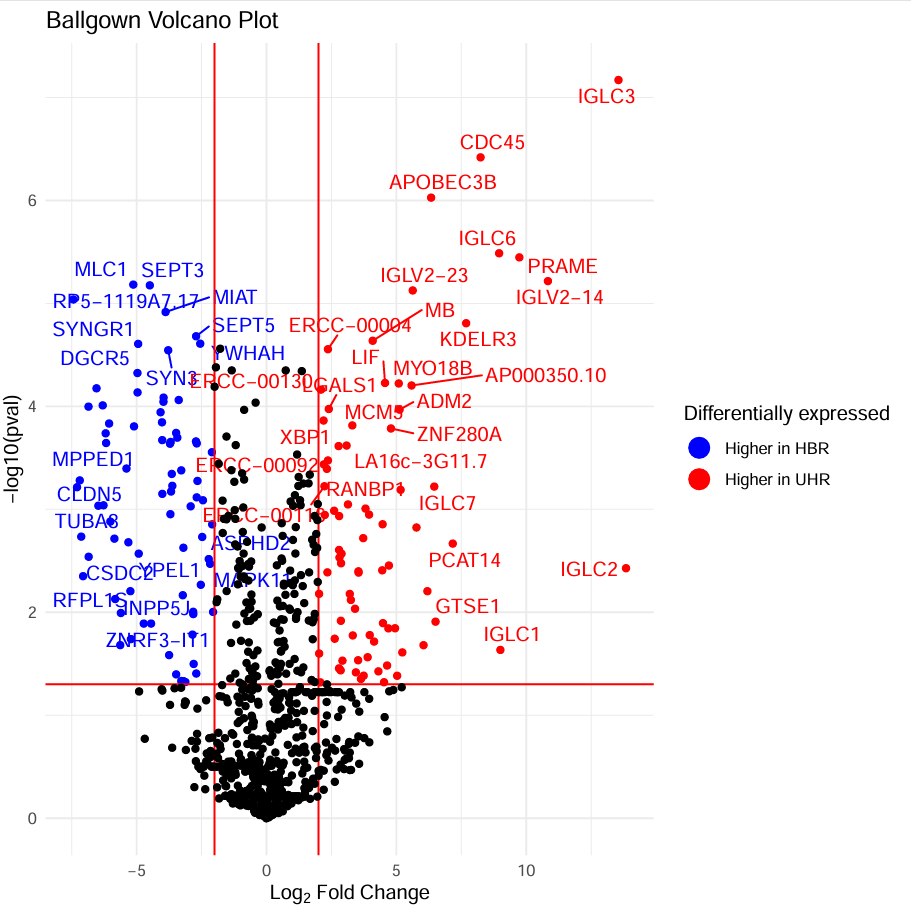

Note: If label diffexpressed as "Up" or "Down" and keep the de (log2fc) cutt off at |0.6| like the course:
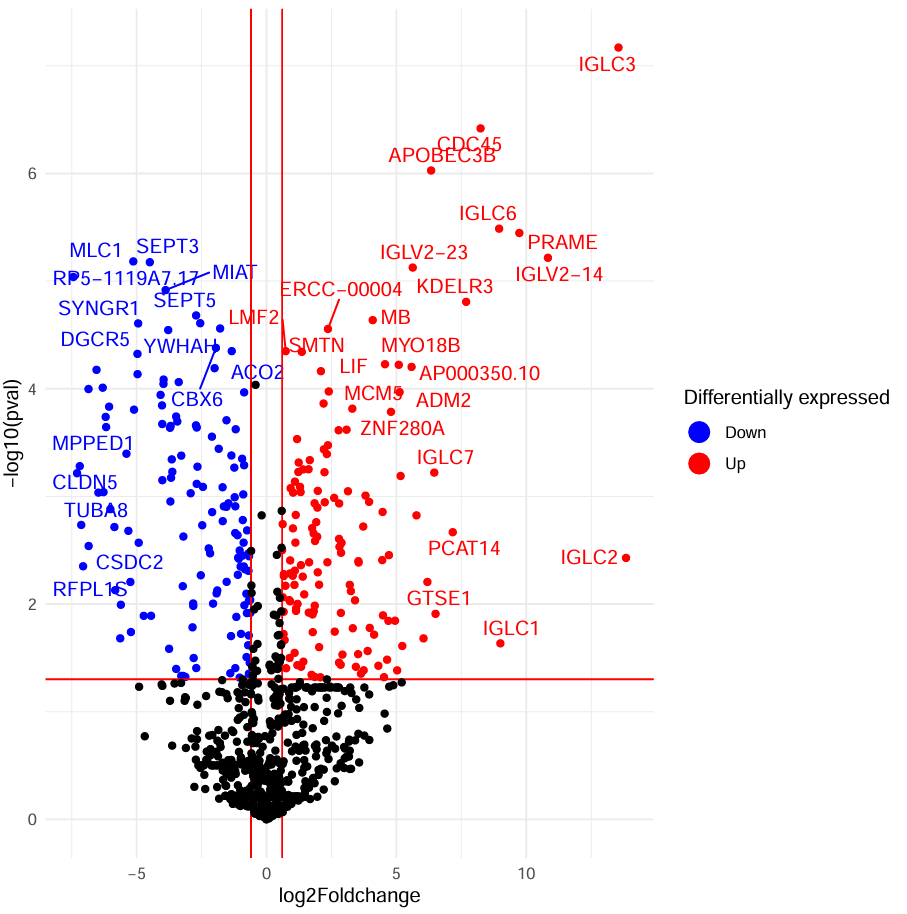

### I also want to see distribution of Ballgown differential expression values as a histogram (like Plot 6 above for DeSEQ2)

In [ ]:
#Display only those results that are significant according to DESeq2 (loaded above)
pdf(file = "Ballgown_FC_distribution.pdf")
sig = which(results_genes$pval < 0.05)
hist(results_genes[sig, "de"], breaks = 50, col = "seagreen", xlab = "log2(Fold change) UHR vs HBR", main = "Distribution of differential expression values-Ballgown")
abline(v = -2, col = "black", lwd = 2, lty = 2)
abline(v = 2, col = "black", lwd = 2, lty = 2)
legend("topleft", "Fold-change > 2", lwd = 2, lty = 2)
dev.off()

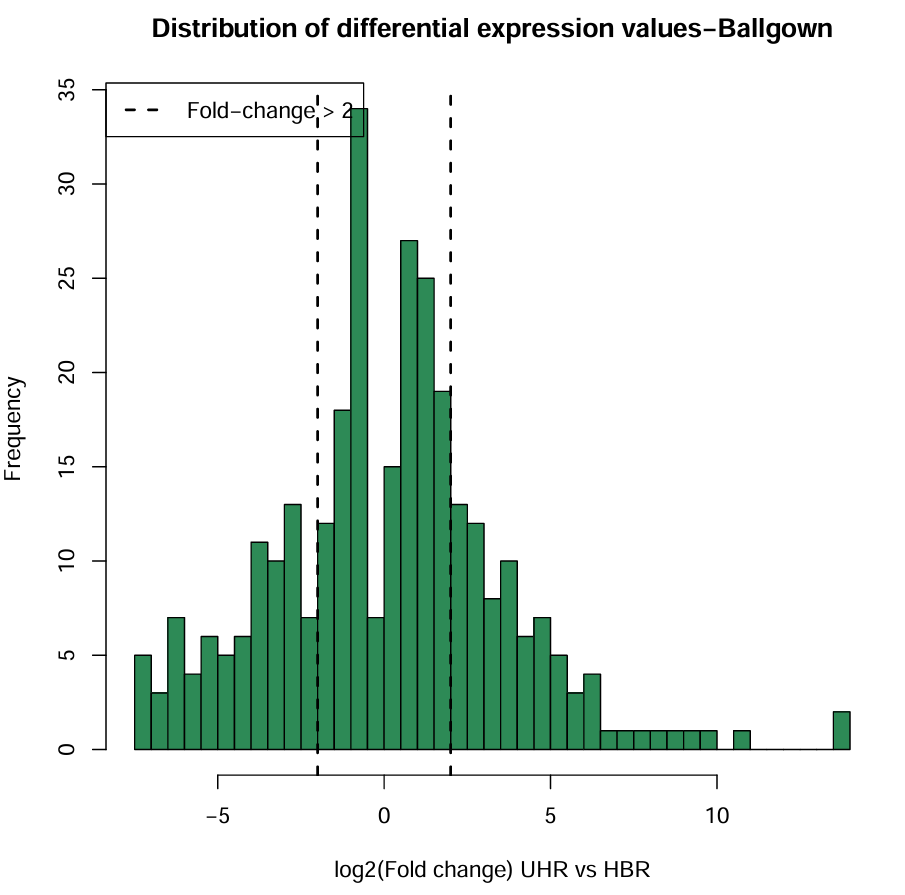

In [ ]:
#### Plot #8 - Create a heatmap to vizualize expression differences between the six samples
#Define custom dist and hclust functions for use with heatmaps
mydist = function(c) {dist(c, method = "euclidian")}
myclust = function(c) {hclust(c, method = "average")}

#Create a subset of significant genes with p-value<0.05 and log2 fold-change >= 2
sigpi = which(results_genes[, "pval"] < 0.05)
sigp = results_genes[sigpi, ]
sigfc = which(abs(sigp[, "de"]) >= 2)
sigDE = sigp[sigfc, ] #

pdf(file = "Ballgown_heatmap_sigDE.pdf")
main_title = "Ballgown significant DE Genes"
par(cex.main = 0.8)
sigDE_genes = sigDE[, "id"]
sigDE_genenames = sigDE[, "gene_name"]

#Import expression results (TPM values) from the HISAT2/Stringtie pipeline (https://genomedata.org/cri-workshop/gene_tpm_all_samples.tsv)
gene_expression = read.table("~/workspace/rnaseq/expression/stringtie/ref_only/gene_tpm_all_samples.tsv", header = TRUE, stringsAsFactors = FALSE, row.names = 1)
#Calculate the TPM sum for all 6 libraries
data_columns = c(1:6)

data = log2(as.matrix(gene_expression[as.vector(sigDE_genes), data_columns]) + 1)
heatmap.2(data, hclustfun = myclust, distfun = mydist, na.rm = TRUE, scale = "none", dendrogram = "both", margins = c(10,4), Rowv = TRUE, Colv = TRUE, symbreaks = FALSE, key = TRUE, symkey = FALSE, density.info = "none", trace = "none", main = main_title, cexRow = 0.3, cexCol = 1, labRow = sigDE_genenames, col = rev(heat.colors(75)))
dev.off()

Note:
as.vector(sigDE_genes) converts the sigDE_genes object into a plain character. Because sigDE_genes is already a character vector — so technically, applying as.vector() is unnecessary in this case.

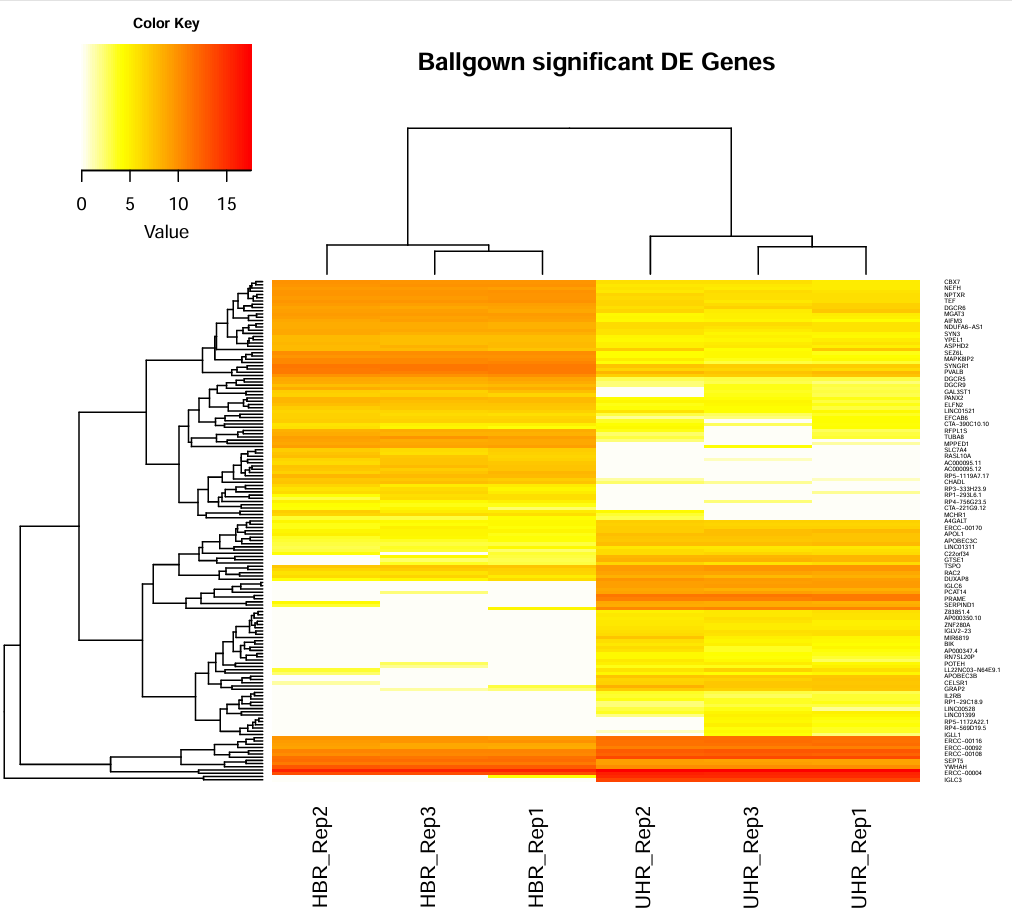

### I want to generate heatmap for DESeq2 significant DE genes NOT THROUGH StringTie gene expression like above

In [ ]:
cd $RNA_HOME/de/deseq2
R
setwd("~/workspace/rnaseq/de/deseq2")
#To read res.rds in R (running inside WSL) from the current working directory
res <- readRDS("res.rds")

# Load required libraries
library(DESeq2)
library(pheatmap)
library(RColorBrewer)

# Filter significant DEGs
res_sig <- res[which(res$padj < 0.05 & abs(res$log2FoldChange) >= 2), ]
res_sig <- res_sig[order(res_sig$padj), ]  # Optional: sort by adjusted p-value

# Extract gene names
sig_gene_names <- rownames(res_sig)

# Extract normalized counts
norm_counts <- counts(dds, normalized = TRUE)

# Subset for significant genes
heatmap_data <- norm_counts[sig_gene_names, ]

# Convert heatmap_data matrix to a data frame first
heatmap_df <- as.data.frame(heatmap_data)

# Add ensemblID column from rownames
heatmap_df$ensemblID <- rownames(heatmap_df)

# Merge with gene_id_mapping to get gene symbols
heatmap_merged <- merge(heatmap_df, gene_id_mapping, by = "ensemblID", all.x = TRUE)

# Replace missing symbols with ensemblID 
heatmap_merged$Symbol[is.na(heatmap_merged$Symbol)] <- heatmap_merged$ensemblID[is.na(heatmap_merged$Symbol)]
# Make symbols unique to avoid duplicate rownames. This appends .1, .2, etc., to duplicated gene symbols (e.g., DGCR5, DGCR5.1) so the heatmap works.
rownames(heatmap_merged) <- make.unique(heatmap_merged$Symbol)

# Remove non-expression columns: ensemblID and Symbol
heatmap_data_final <- heatmap_merged[, !(colnames(heatmap_merged) %in% c("ensemblID", "Symbol"))]

# Make annotation for columns (if desired)
# For example, assuming dds has a column called 'condition'
sample_info <- as.data.frame(colData(dds)[, "Condition", drop = FALSE])

# Plot heatmap
pdf(file = "DESeq2_heatmap_sigDE_Lam.pdf")
pheatmap(log2(as.matrix(heatmap_data_final) + 1),
         annotation_col = sample_info,
         show_rownames = TRUE,
         cluster_cols = TRUE,
         cluster_rows = TRUE,
         fontsize = 10,
         fontsize_row = 3,  # reduce gene symbol font size
         main = "DESeq2: Log2(Normalized Count + 1) of Significant DE Genes (Lam)",
         color = colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(100))
dev.off()

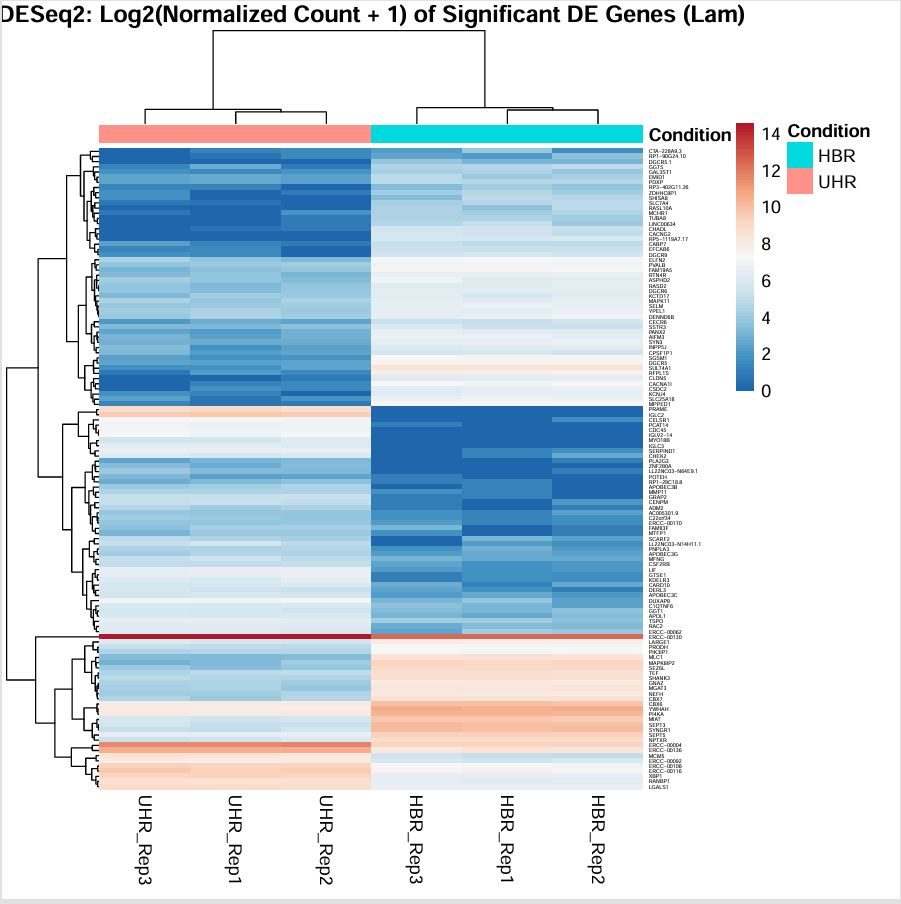

#### 🔶 pheatmap vs. heatmap.2 — Which is more popular?
✅ pheatmap is more popular today for RNA-seq and bioinformatics:

| Feature               | `pheatmap`                                   | `heatmap.2` (from `gplots`)      |
| --------------------- | -------------------------------------------- | -------------------------------- |
| **Popularity**        | Widely used in RNA-seq pipelines, tutorials  | Older, still used in legacy code |
| **Ease of use**       | Simpler syntax, more intuitive customization | Requires more manual setup       |
| **Colorbars**         | Built-in legend and annotations              | Needs more manual customization  |
| **Annotations**       | Native support for sample annotations        | More work to add annotations     |
| **Cluster trees**     | Dendrograms by default                       | Yes, but less flexible           |
| **ggplot2-friendly?** | No, but integrates well in scripts           | No                               |